# Features
0. Minority Serving 
1. Hispanic serving institutions (HS)
2. Historically Black Colleges and Universities (HBCUs)
3. Tribal colleges: probably too few
   - Tribal colleges are native/indigenous owned/operated not just native-serving to my understanding
4. Women's: too small and few in number
5. STEM vs non-STEM category
6. Land-grant vs non-land grant correction
   - "Land-grant" university

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

classifications_df = pd.read_csv('../personal_data/classifications.csv')

"""
UNITID : Unique IPEDS identification number for an institution
"""
unit_features = ['unitid']

"""
MINORITIZED

MSI : Minority Serving Institution (HSI, HBCU, or Tribal College or University only)
HBCU : Historically Black College or University
HSI : Hispanic Serving Institution (Using composite lists)
TRIBAL : Tribal College flag
"""
minority_features = ['msi', 'hbcu', 'hsi', 'tribal']
minority_values = {
    'msi': {'yes': 1, 'no': 0},
    'hbcu': {'yes': 1, 'no': 2},
    'hsi': {'yes': 1, 'no': 0},
    'tribal': {'yes': 1, 'no': 2}
}

"""
WOMENS : Women's College flag
"""
womens_features = ['womens']

"""
BASIC CATEGORIZATIONS

BASIC2005 : 2005 Basic Classification (historical - not updated)
BASIC2010 : 2010 Basic Classification (historical - not updated)
BASIC2015 : 2015 Basic Classification (historical - not updated)
BASIC2018 : 2018 Basic Classification (historical - not updated)
BASIC2021 : 2021 Basic Classification 
"""
basic_features = ['basic2005', 'basic2010', 'basic2015', 'basic2018', 'basic2021']

"""
STEM_RSD : STEM research/scholarship doctoral degrees
"""
stem_features = ['stem_rsd']

"""
LANDGRNT : Land-grant institution
"""
land_grant_features = ['landgrnt']

"""
ACT

ACTCMP25 : ACT Composite Score, 25 percentile
ACTFINAL : Derived 25th percentile ACT score, weighting both ACT and equated SAT scores by number submitted
NACT : Number of first-time entering students who submitted ACT score
SATACTEQ25 : The ACT equivalent score for the combined 25th percentile SAT score
SATCMB25 : Combined SAT-Math and SAT-Verbal 25th percentiles scores
SATM25 : SAT-Math 25th percentile score
SATV25 : SAT-Verbal 25th percentile score
"""
act_features = ['actcmp25', 'actfinal', 'nact', 'satacteq25', 'satcmb25', 'satm25', 'satv25']

"""
SIZING

BACCDEG : Bachelor's degree total
SIZESET2021	: 2021 Size and Setting Classification
UGDSFT20 : Undergraduate degree-seeking full-time enrollment
UGDSPT20 : Undergraduate degree-seeking part-time enrollment
UGN1STTMFT20 : Undergraduate new first-time full-time students
UGN1STTMPT20 : Undergraduate new first-time part-time students
UGNDFT20 : Undergraduate non-degree full-time students
UGNDPT20 : Undergraduate non-degree part-time students
UGNTRFT20 : Undergraduate new transfer-in full-time students
UGNTRPT20 : Undergraduate new transfer-in part-time students
UGPROFILE2021 : 2021 Undergraduate Profile Classification
UGTENR20 : Undergraduate total enrollment, fall 2020
""" 
size_features = ['baccdeg', 'sizeset2021', 'ugdsft20', 'ugdspt20', 'ugn1sttmft20', 'ugn1sttmpt20', 'ugndft20', 'ugndpt20', 'ugntrft20', 'ugntrpt20', 'ugprofile2021', 'ugtenr20']

"""

INTER-STATE REGIONS

regions_UCSB: made using the US Census Beureau's latest metrpolitan and micropolitan data

"""
regions_USCB = {
    'Allentown-Bethlehem-East Stroudsburg, PA-NJ': ['NJ', 'PA'],
    'Atlanta--Athens-Clarke County--Sandy Springs, GA-AL': ['AL', 'GA'],
    'Boise City-Mountain Home-Ontario, ID-OR': ['ID', 'OR'],
    'Boston-Worcester-Providence, MA-RI-NH': ['MA', 'NH', 'RI'],
    'Brookings-Crescent City, OR-CA': ['CA', 'OR'],
    'Burlington-Fort Madison, IA-IL': ['IA', 'IL'],
    'Cape Girardeau-Sikeston, MO-IL': ['IL', 'MO'],
    'Charleston-Huntington-Ashland, WV-OH-KY': ['KY', 'OH', 'WV'],
    'Charlotte-Concord, NC-SC': ['NC', 'SC'],
    'Chattanooga-Cleveland-Dalton, TN-GA-AL': ['AL', 'GA', 'TN'],
    'Chicago-Naperville, IL-IN-WI': ['IL', 'IN', 'WI'],
    'Cincinnati-Wilmington, OH-KY-IN': ['IN', 'KY', 'OH'],
    'Columbus-Auburn-Opelika, GA-AL': ['AL', 'GA'],
    'Dallas-Fort Worth, TX-OK': ['OK', 'TX'],
    'Davenport-Moline, IA-IL': ['IA', 'IL'],
    'Duluth-Grand Rapids, MN-WI': ['MN', 'WI'],
    'El Paso-Las Cruces, TX-NM': ['NM', 'TX'],
    'Evansville-Henderson, IN-KY': ['IN', 'KY'],
    'Fargo-Wahpeton, ND-MN': ['MN', 'ND'],
    'Huntsville-Decatur-Albertville, AL-TN': ['AL', 'TN'],
    'Jacksonville-Kingsland-Palatka, FL-GA': ['FL', 'GA'],
    'Johnson City-Kingsport-Bristol, TN-VA': ['TN', 'VA'],
    'Joplin-Miami, MO-OK-KS': ['KS', 'MO', 'OK'],
    'Kansas City-Overland Park-Kansas City, MO-KS': ['KS', 'MO'],
    'Keene-Brattleboro, NH-VT': ['NH', 'VT'],
    'La Crosse-Onalaska-Sparta, WI-MN': ['MN', 'WI'],
    'Louisville/Jefferson County--Elizabethtown, KY-IN': ['IN', 'KY'],
    'Marinette-Iron Mountain, WI-MI': ['MI', 'WI'],
    'Memphis-Clarksdale-Forrest City, TN-MS-AR': ['AR', 'MS', 'TN'],
    'Minneapolis-St. Paul, MN-WI': ['MN', 'WI'],
    'New Orleans-Metairie-Slidell, LA-MS': ['LA', 'MS'],
    'New York-Newark, NY-NJ-CT-PA': ['CT', 'NJ', 'NY', 'PA'],
    'Omaha-Fremont, NE-IA': ['IA', 'NE'],
    'Paducah-Mayfield, KY-IL': ['IL', 'KY'],
    'Parkersburg-Marietta-Vienna, WV-OH': ['OH', 'WV'],
    'Philadelphia-Reading-Camden, PA-NJ-DE-MD': ['DE', 'MD', 'NJ', 'PA'],
    'Pittsburgh-Weirton-Steubenville, PA-OH-WV': ['OH', 'PA', 'WV'],
    'Portland-Vancouver-Salem, OR-WA': ['OR', 'WA'],
    'Pullman-Moscow, WA-ID': ['ID', 'WA'],
    'Quincy-Hannibal, IL-MO': ['IL', 'MO'],
    'Reno-Carson City-Gardnerville Ranchos, NV-CA': ['CA', 'NV'],
    'Salt Lake City-Provo-Orem, UT-ID': ['ID', 'UT'],
    'Sioux City-Le Mars, IA-NE-SD': ['IA', 'NE', 'SD'],
    'South Bend-Elkhart-Mishawaka, IN-MI': ['IN', 'MI'],
    "Spokane-Spokane Valley-Coeur d'Alene, WA-ID": ['ID', 'WA'],
    'St. Louis-St. Charles-Farmington, MO-IL': ['IL', 'MO'],
    'Tallahassee-Bainbridge, FL-GA': ['FL', 'GA'],
    'Virginia Beach-Chesapeake, VA-NC': ['NC', 'VA'],
    'Washington-Baltimore-Arlington, DC-MD-VA-WV-PA': ['DC', 'MD', 'PA', 'VA', 'WV']
 }

# Carnegie Classifications

## 2021
broad_carnegie_classification_2021 = {
    -2: 'Not Classified',
    1: "Associate's Colleges",
    2: "Associate's Colleges",
    3: "Associate's Colleges",
    4: "Associate's Colleges",
    5: "Associate's Colleges",
    6: "Associate's Colleges",
    7: "Associate's Colleges",
    8: "Associate's Colleges",
    9: "Associate's Colleges",
    10: 'Special Focus Institutions',
    11: 'Special Focus Institutions',
    12: 'Special Focus Institutions',
    13: 'Special Focus Institutions',
    14: "Associate's Colleges",
    15: 'R1 Universities',                    # Doctoral Universities: Very High Research Activity
    16: 'R2 Universities',                    # Doctoral Universities: High Research Activity
    17: 'Other Doctoral Universities',        # Doctoral/Professional Universities
    18: "Master's Colleges and Universities",
    19: "Master's Colleges and Universities",
    20: "Master's Colleges and Universities",
    21: 'Baccalaureate Colleges',
    22: 'Baccalaureate Colleges',
    23: 'Baccalaureate Colleges',
    24: 'Special Focus Institutions',
    25: 'Special Focus Institutions',
    26: 'Special Focus Institutions',
    27: 'Special Focus Institutions',
    28: 'Special Focus Institutions',
    29: 'Special Focus Institutions',
    30: 'Special Focus Institutions',
    31: 'Special Focus Institutions',
    32: 'Special Focus Institutions',
    33: 'Tribal Colleges and Universities'
}

broad_carnegie_classification_2018 = {
    -2: 'Not Classified',
    1: "Associate's Colleges",
    2: "Associate's Colleges",
    3: "Associate's Colleges",
    4: "Associate's Colleges",
    5: "Associate's Colleges",
    6: "Associate's Colleges",
    7: "Associate's Colleges",
    8: "Associate's Colleges",
    9: "Associate's Colleges",
    10: 'Special Focus Institutions',
    11: 'Special Focus Institutions',
    12: 'Special Focus Institutions',
    13: 'Special Focus Institutions',
    14: "Associate's Colleges",
    15: 'R1 Universities',                    # Doctoral Universities: Very High Research Activity
    16: 'R2 Universities',                    # Doctoral Universities: High Research Activity
    17: 'Other Doctoral Universities',        # Doctoral/Professional Universities
    18: "Master's Colleges and Universities",
    19: "Master's Colleges and Universities",
    20: "Master's Colleges and Universities",
    21: 'Baccalaureate Colleges',
    22: 'Baccalaureate Colleges',
    23: 'Baccalaureate Colleges',
    24: 'Special Focus Institutions',
    25: 'Special Focus Institutions',
    26: 'Special Focus Institutions',
    27: 'Special Focus Institutions',
    28: 'Special Focus Institutions',
    29: 'Special Focus Institutions',
    30: 'Special Focus Institutions',
    31: 'Special Focus Institutions',
    32: 'Special Focus Institutions',
    33: 'Tribal Colleges and Universities'
}

broad_carnegie_classification_2015 = {
    -2: 'Not Classified',
    1: "Associate's Colleges",
    2: "Associate's Colleges",
    3: "Associate's Colleges",
    4: "Associate's Colleges",
    5: "Associate's Colleges",
    6: "Associate's Colleges",
    7: "Associate's Colleges",
    8: "Associate's Colleges",
    9: "Associate's Colleges",
    10: 'Special Focus Institutions',
    11: 'Special Focus Institutions',
    12: 'Special Focus Institutions',
    13: 'Special Focus Institutions',
    14: "Associate's Colleges",
    15: 'R1 Universities',                    # Doctoral Universities: Highest Research Activity
    16: 'R2 Universities',                    # Doctoral Universities: Higher Research Activity
    17: 'Other Doctoral Universities',        # Doctoral Universities: Moderate Research Activity
    18: "Master's Colleges and Universities",
    19: "Master's Colleges and Universities",
    20: "Master's Colleges and Universities",
    21: 'Baccalaureate Colleges',
    22: 'Baccalaureate Colleges',
    23: 'Baccalaureate Colleges',
    24: 'Special Focus Institutions',
    25: 'Special Focus Institutions',
    26: 'Special Focus Institutions',
    27: 'Special Focus Institutions',
    28: 'Special Focus Institutions',
    29: 'Special Focus Institutions',
    30: 'Special Focus Institutions',
    31: 'Special Focus Institutions',
    32: 'Special Focus Institutions',
    33: 'Tribal Colleges and Universities'
}

broad_carnegie_classification_2005_and_2010 = {
    -2: 'Not Classified',
    1: "Associate's Colleges",
    2: "Associate's Colleges",
    3: "Associate's Colleges",
    4: "Associate's Colleges",
    5: "Associate's Colleges",
    6: "Associate's Colleges",
    7: "Associate's Colleges",
    8: "Associate's Colleges",
    9: "Associate's Colleges",
    10: "Associate's Colleges",
    11: "Associate's Colleges",
    12: "Associate's Colleges",
    13: "Associate's Colleges",
    14: "Associate's Colleges",
    15: 'R1 Universities',                    # RU/VH: Research Universities (very high research activity)
    16: 'R2 Universities',                    # RU/H: Research Universities (high research activity)
    17: 'Other Doctoral Universities',        # DRU: Doctoral/Research Universities
    18: "Master's Colleges and Universities",
    19: "Master's Colleges and Universities",
    20: "Master's Colleges and Universities",
    21: 'Baccalaureate Colleges',
    22: 'Baccalaureate Colleges',
    23: 'Baccalaureate Colleges',
    24: 'Special Focus Institutions',
    25: 'Special Focus Institutions',
    26: 'Special Focus Institutions',
    27: 'Special Focus Institutions',
    28: 'Special Focus Institutions',
    29: 'Special Focus Institutions',
    30: 'Special Focus Institutions',
    31: 'Special Focus Institutions',
    32: 'Special Focus Institutions',
    33: 'Tribal Colleges and Universities'
}

broad_carnegie_classification_2000 = {
    -2: 'Not Classified',
    15: 'R1 Universities',                    # Doctoral/Research Universities—Extensive
    16: 'R2 Universities',                    # Doctoral/Research Universities—Intensive
    21: "Master's Colleges and Universities",
    22: "Master's Colleges and Universities",
    31: 'Baccalaureate Colleges',
    32: 'Baccalaureate Colleges',
    33: 'Baccalaureate Colleges',
    40: "Associate's Colleges",
    51: 'Special Focus Institutions',
    52: 'Special Focus Institutions',
    53: 'Special Focus Institutions',
    54: 'Special Focus Institutions',
    55: 'Special Focus Institutions',
    56: 'Special Focus Institutions',
    57: 'Special Focus Institutions',
    58: 'Special Focus Institutions',
    59: 'Special Focus Institutions',
    60: 'Tribal Colleges and Universities'
}

broad_carnegie_classification = {
    2021: broad_carnegie_classification_2021,
    2018: broad_carnegie_classification_2018,
    2015: broad_carnegie_classification_2015,
    2010: broad_carnegie_classification_2005_and_2010,
    2005: broad_carnegie_classification_2005_and_2010, 
    2000: broad_carnegie_classification_2000
}

## Unit Feature

In [2]:
unit_features
classifications_df[unit_features]

,unitid
0,100654
1,100663
2,100690
3,100706
4,100724
...,...
3934,496186
3935,999903
3936,999907
3937,999909


## Minority Features

In [3]:
minority_features
classifications_df[minority_features]

,msi,hbcu,hsi,tribal
0,1,1,0,2
1,0,2,0,2
2,0,2,0,2
3,0,2,0,2
4,1,1,0,2
...,...,...,...,...
3934,0,2,0,2
3935,0,2,0,2
3936,0,2,0,2
3937,0,2,0,2


## Womens Features

In [4]:
womens_features
classifications_df[womens_features]

,womens
0,0
1,0
2,0
3,0
4,0
...,...
3934,0
3935,0
3936,0
3937,0


## Basic Features

In [5]:
basic_features
classifications_df[basic_features]

,basic2005,basic2010,basic2015,basic2018,basic2021
0,18,18,18,18,18
1,15,15,15,15,15
2,24,24,20,20,20
3,16,15,16,16,15
4,18,18,19,19,17
...,...,...,...,...,...
3934,-2,-2,-2,-2,11
3935,-2,-2,-2,32,32
3936,-2,-2,-2,32,32
3937,-2,-2,-2,32,32


## Stem Features

In [6]:
stem_features
classifications_df[stem_features]

,stem_rsd
0,NaN
1,99.0
2,NaN
3,50.0
4,NaN
...,...
3934,NaN
3935,NaN
3936,NaN
3937,NaN


## Land Grant Features

In [7]:
land_grant_features
classifications_df[land_grant_features]

,landgrnt
0,1
1,2
2,2
3,2
4,2
...,...
3934,2
3935,2
3936,2
3937,2


## ACT Features

In [8]:
act_features
classifications_df[act_features]

,actcmp25,actfinal,nact,satacteq25,satcmb25,satm25,satv25
0,15.0,15.000000,1202.0,15.0,840.0,410.0,430.0
1,22.0,21.875310,2120.0,21.0,1090.0,530.0,560.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,24.0,24.000000,1248.0,24.0,1170.0,580.0,590.0
4,14.0,14.298675,688.0,15.0,840.0,406.0,438.0
...,...,...,...,...,...,...,...
3934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3935,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3936,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3937,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## Sizing Features

In [9]:
size_features
classifications_df[size_features]

,baccdeg,sizeset2021,ugdsft20,ugdspt20,ugn1sttmft20,ugn1sttmpt20,ugndft20,ugndpt20,ugntrft20,ugntrpt20,ugprofile2021,ugtenr20
0,585,14,4663,427,1525,10,0,3,154,20,10,5093
1,2725,15,10352,3197,2102,52,50,279,830,415,9,13878
2,27,6,172,126,0,0,0,0,133,95,5,298
3,1529,13,6718,1107,1328,17,12,190,577,159,15,8027
4,561,14,3289,314,926,49,0,11,130,7,10,3614
...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0,1,134,0,6,0,0,0,29,0,4,134
3935,0,18,0,0,0,0,0,0,0,0,0,0
3936,0,18,0,0,0,0,0,0,0,0,0,0
3937,0,18,0,0,0,0,0,0,0,0,0,0


--------

## Inter-State Metro Regions

Collect all inter-state metropolitan areas according to latest [U.S. Census Bureau - Metropolitan and Micropolitan Statistical Areas](https://www.census.gov/programs-surveys/metro-micro.html).

In [10]:
politans_df = pd.read_csv('../personal_data/metro_micro.csv')[['CBSA Title', 'Metropolitan/Micropolitan Statistical Area', 'CSA Title']]

In [11]:
# Extract the state abbreviation and augment with a new 'State' column
politans_df['State'] = politans_df['CSA Title'].str.split(', ').str[-1].str.split('-')

In [12]:
grouped = politans_df.groupby('CSA Title')['State']
# For aggregating the states within a group
def aggregate_states(states_series):
    all_states = set()
    for state_list in states_series:
        all_states.update(state_list)
    return sorted(all_states)

# Apply aggregation
regions_series = grouped.apply(aggregate_states)

# Keep only those having at least two states
regions_series_multi_state = regions_series[regions_series.apply(lambda x: len(x) > 1)]

# Transform to a dictionary
regions_dict = regions_series_multi_state.to_dict()

# May also report just the state tuples
regions = sorted({str(states_list).replace("'", "") for states_list in regions_dict.values()})

In [13]:
regions_dict

{'Allentown-Bethlehem-East Stroudsburg, PA-NJ': ['NJ', 'PA'],
 'Atlanta--Athens-Clarke County--Sandy Springs, GA-AL': ['AL', 'GA'],
 'Boise City-Mountain Home-Ontario, ID-OR': ['ID', 'OR'],
 'Boston-Worcester-Providence, MA-RI-NH': ['MA', 'NH', 'RI'],
 'Brookings-Crescent City, OR-CA': ['CA', 'OR'],
 'Burlington-Fort Madison, IA-IL': ['IA', 'IL'],
 'Cape Girardeau-Sikeston, MO-IL': ['IL', 'MO'],
 'Charleston-Huntington-Ashland, WV-OH-KY': ['KY', 'OH', 'WV'],
 'Charlotte-Concord, NC-SC': ['NC', 'SC'],
 'Chattanooga-Cleveland-Dalton, TN-GA-AL': ['AL', 'GA', 'TN'],
 'Chicago-Naperville, IL-IN-WI': ['IL', 'IN', 'WI'],
 'Cincinnati-Wilmington, OH-KY-IN': ['IN', 'KY', 'OH'],
 'Columbus-Auburn-Opelika, GA-AL': ['AL', 'GA'],
 'Dallas-Fort Worth, TX-OK': ['OK', 'TX'],
 'Davenport-Moline, IA-IL': ['IA', 'IL'],
 'Duluth-Grand Rapids, MN-WI': ['MN', 'WI'],
 'El Paso-Las Cruces, TX-NM': ['NM', 'TX'],
 'Evansville-Henderson, IN-KY': ['IN', 'KY'],
 'Fargo-Wahpeton, ND-MN': ['MN', 'ND'],
 'Huntsville-

## Conclusion

According to the most recent U.S. Census Bureau - Metropolitan and Micropolitan Statistical Areas, there are 40 inter-state metro areas. Some include others.

[AL, GA, TN]
[AL, GA]
[AL, TN]
[AR, MS, TN]
[CA, NV]
[CA, OR]
[CT, NJ, NY, PA]
[DC, MD, PA, VA, WV]
[DE, MD, NJ, PA]
[FL, GA]
[IA, IL]
[IA, NE, SD]
[IA, NE]
[ID, OR]
[ID, UT]
[ID, WA]
[IL, IN, WI]
[IL, KY]
[IL, MO]
[IN, KY, OH]
[IN, KY]
[IN, MI]
[KS, MO, OK]
[KS, MO]
[KY, OH, WV]
[LA, MS]
[MA, NH, RI]
[MI, WI]
[MN, ND]
[MN, WI]
[NC, SC]
[NC, VA]
[NH, VT]
[NJ, PA]
[NM, TX]
[OH, PA, WV]
[OH, WV]
[OK, TX]
[OR, WA]
[TN, VA]

----------

## Data Exploration

In [14]:
# Load data

classifications_df = pd.read_csv('../personal_data/classifications.csv')
classifications_df.head()

,unitid,name,city,stabbr,basic2000,basic2005,basic2010,basic2015,basic2018,basic2021,...,satv25,satm25,satcmb25,actcmp25,satacteq25,actfinal,appsf20,admitsf20,pctadmitf20,selindex
0,100654,Alabama A & M University,Normal,AL,16,18,18,18,18,18,...,430.0,410.0,840.0,15.0,15.0,15.000000,9855.0,8835.0,0.896499,1.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,15,15,15,15,15,15,...,560.0,530.0,1090.0,22.0,21.0,21.875310,10391.0,8375.0,0.805986,2.0
2,100690,Amridge University,Montgomery,AL,51,24,24,20,20,20,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,16,16,15,16,16,15,...,590.0,580.0,1170.0,24.0,24.0,24.000000,5793.0,4467.0,0.771103,3.0
4,100724,Alabama State University,Montgomery,AL,21,18,18,19,19,17,...,438.0,406.0,840.0,14.0,15.0,14.298675,7027.0,6948.0,0.988758,1.0


### Missing Values

In [15]:
# Missing values
classifications_df.isnull().sum()

unitid            0
name              0
city              0
stabbr            0
basic2000         0
               ... 
actfinal       1288
appsf20        1288
admitsf20      1288
pctadmitf20    1288
selindex       1288
Length: 103, dtype: int64

### Basic Functions defined

In [16]:
# Basic summary statistics and plots 

def plot_pairwise(df, features):
    sns.pairplot(df[features].dropna())
    plt.show()

def get_correlations(df, features):
    return df[features].corr()

def plot_correlations(df, features):
    plt.figure(figsize=(10, 8))
    sns.heatmap(get_correlations(df, features), annot = True, cmap = 'coolwarm', linewidths = 0.5)
    plt.title('Correlation Matrix across Features')
    plt.show()

def get_summary(df, features):
    return df[features].describe()

def t_test(df, feature_1, feature_2):
    t_stat, p_value = stats.ttest_ind(df[feature_1], df[feature_2])
    print(f't-test on {feature_1} and {feature_2} gives:')
    print(f'\tt-statistic: {t_stat}, p-value: {p_value}')

def plot_distribution(df, features):
    for feature in features:
        sns.histplot(df[feature].dropna(), kde = True)
        plt.title(f'Distribution of {feature}')
        plt.show()
    
def plot_categorical(df, features):
    for feature in features:
        sns.countplot(x = feature, data = df)
        plt.title(f'Count of {feature}')
        plt.show()

### Pairwise

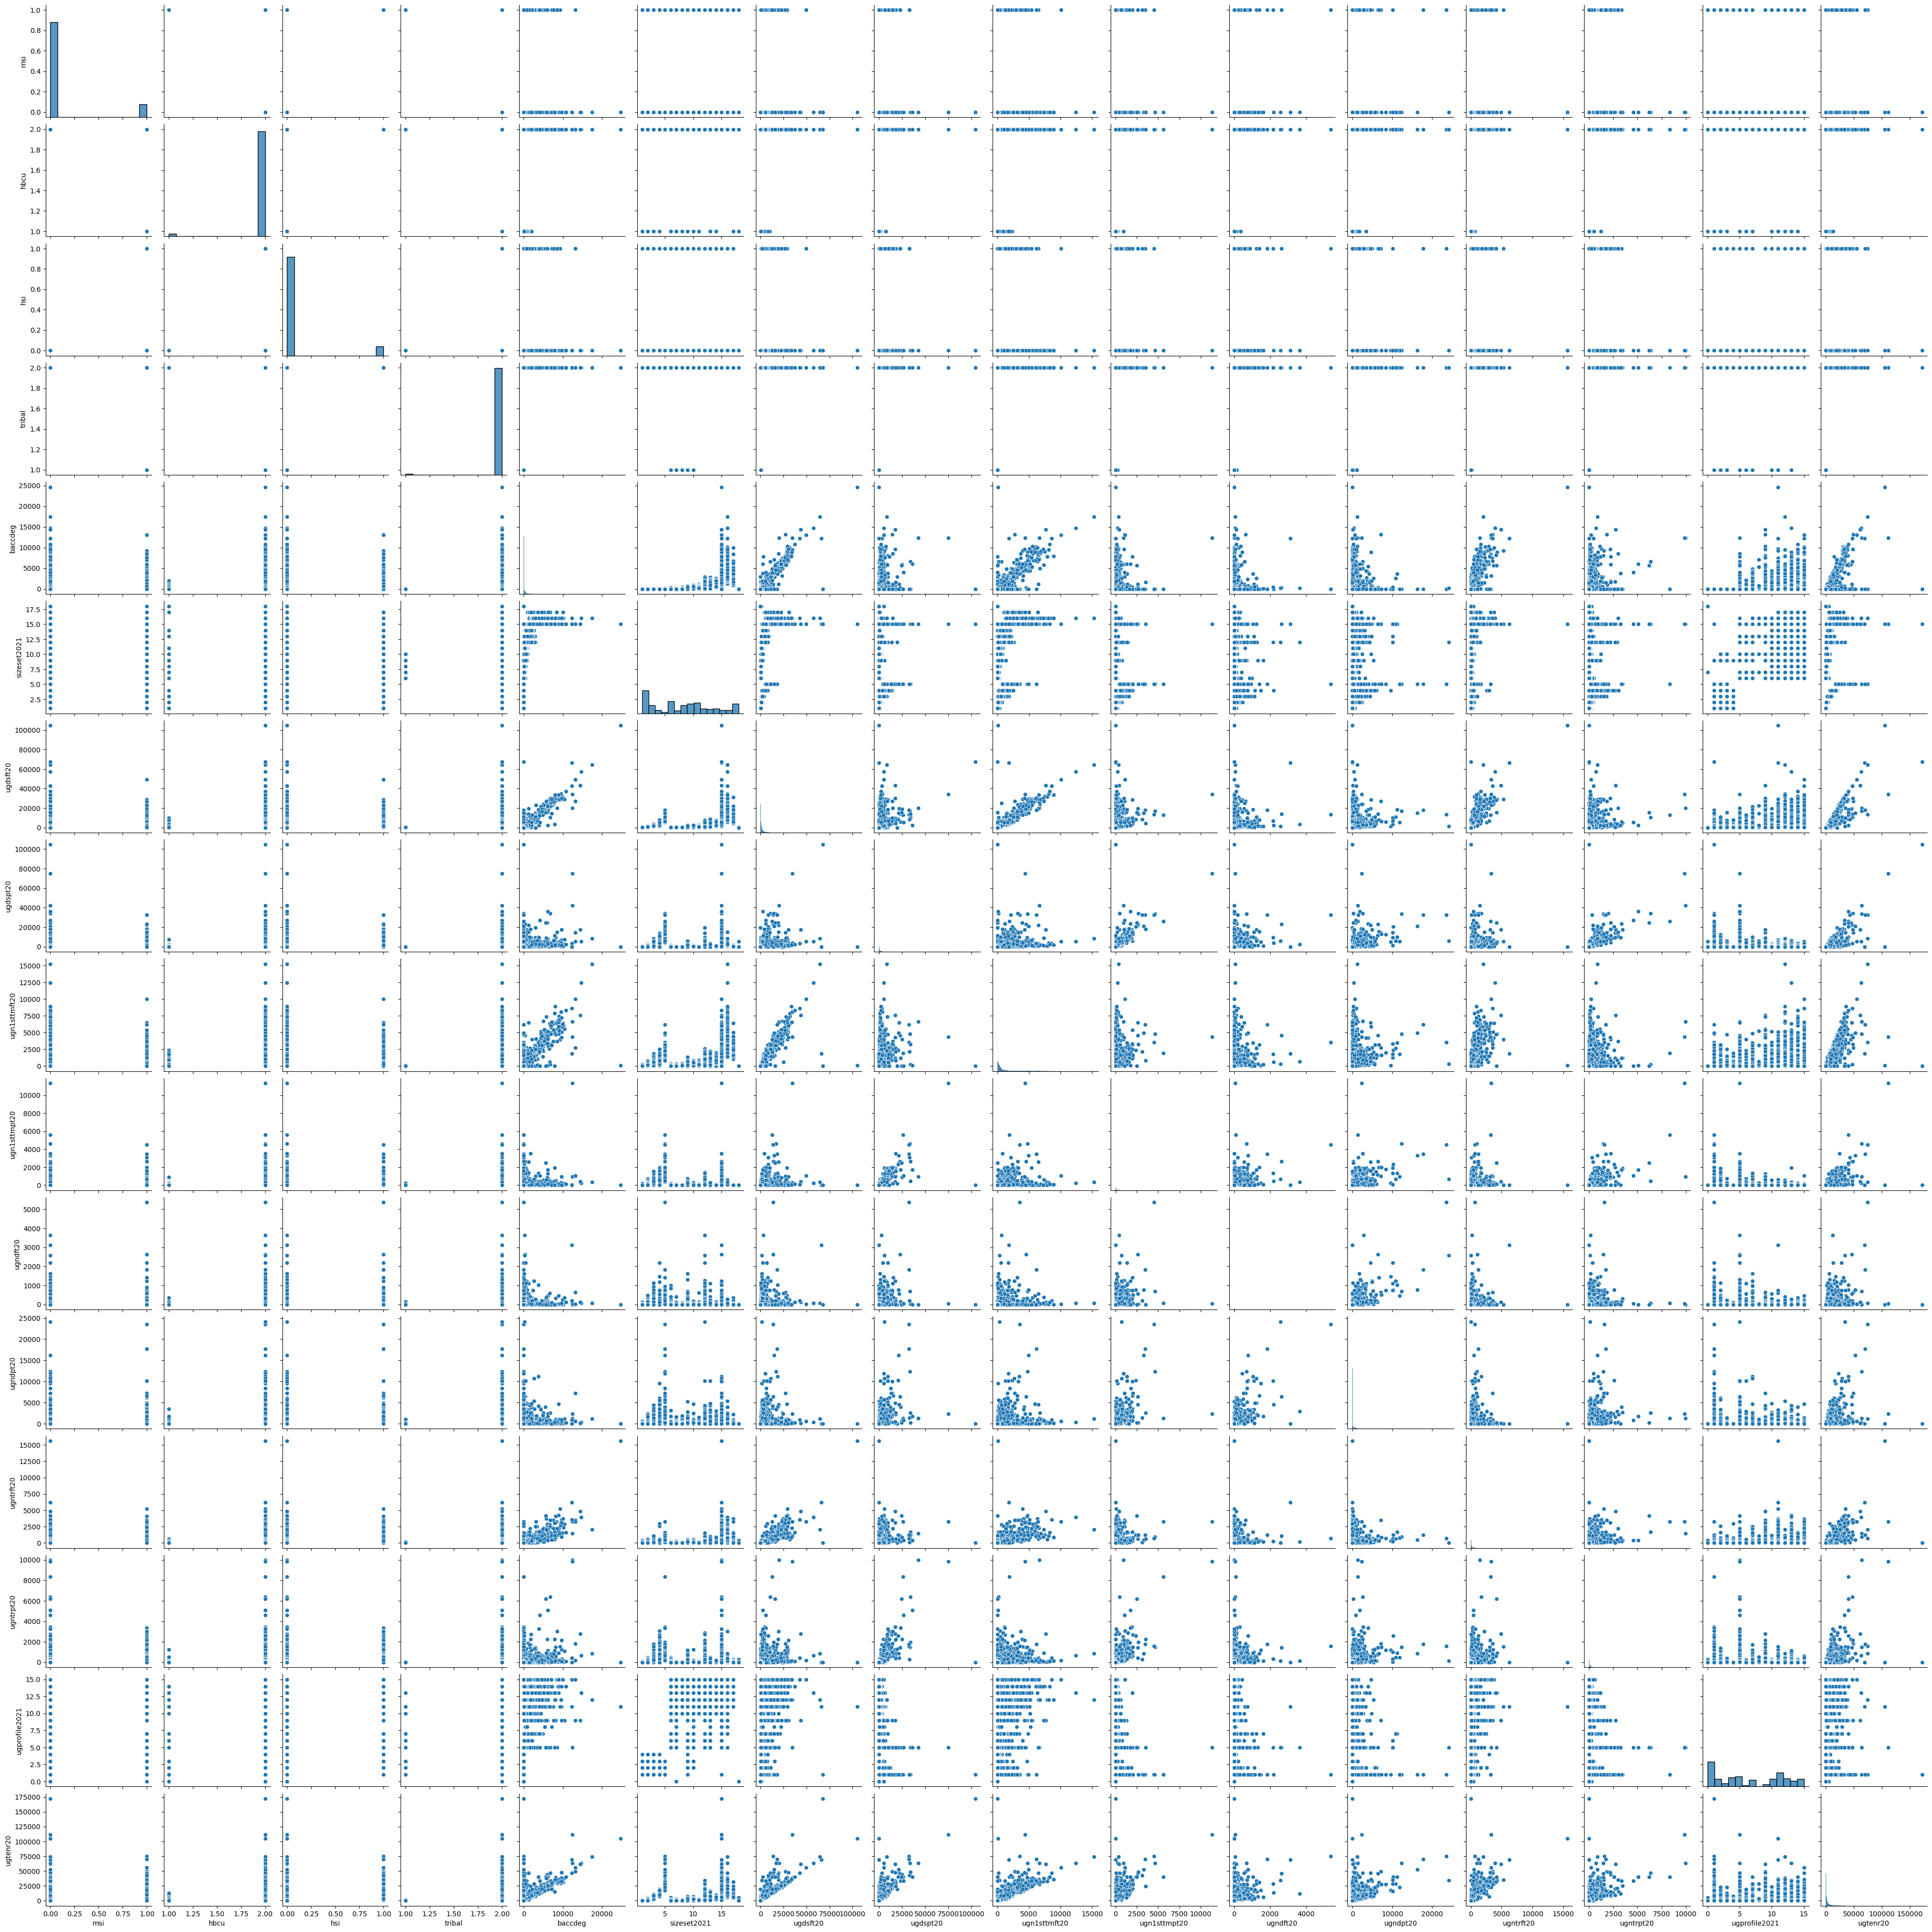

In [17]:
plot_pairwise(classifications_df, minority_features + size_features)

### Distribution of ACT Features

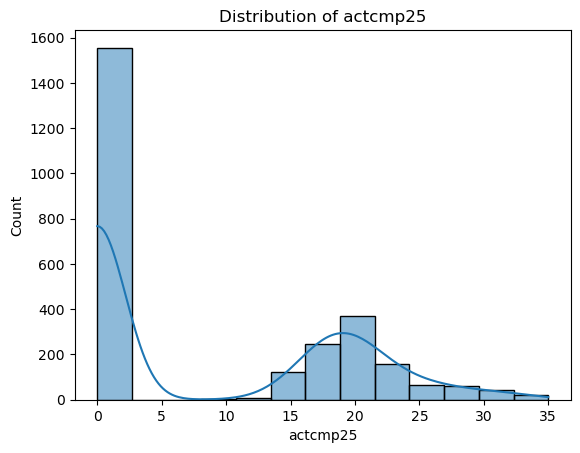

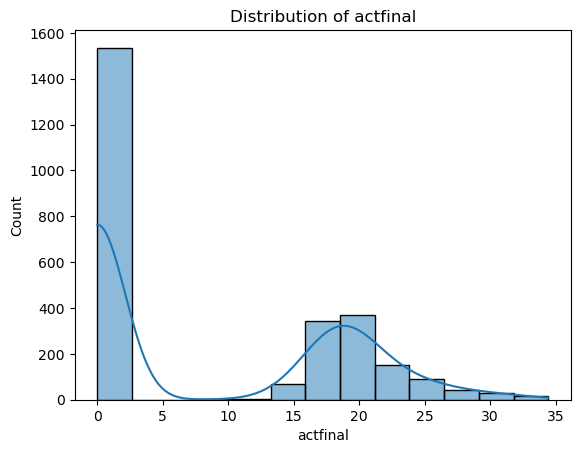

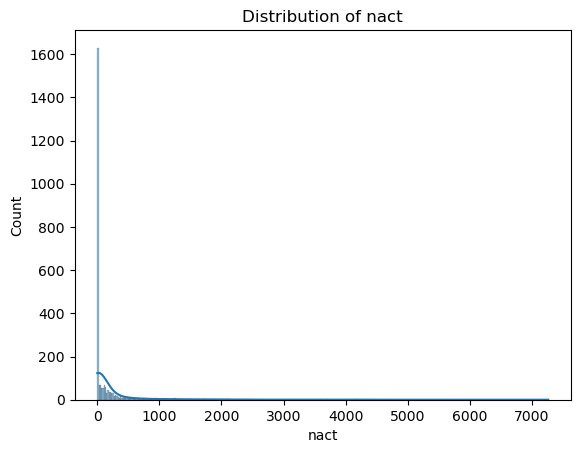

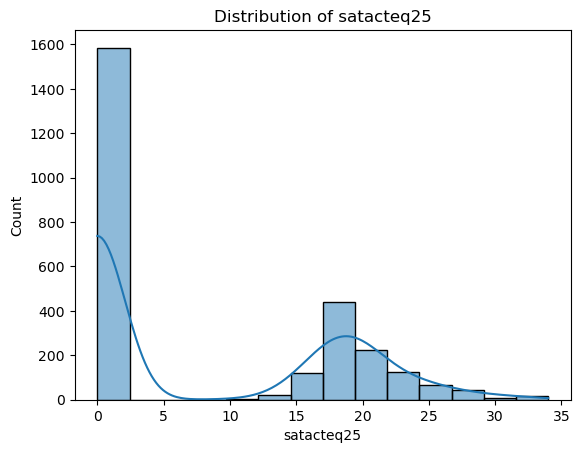

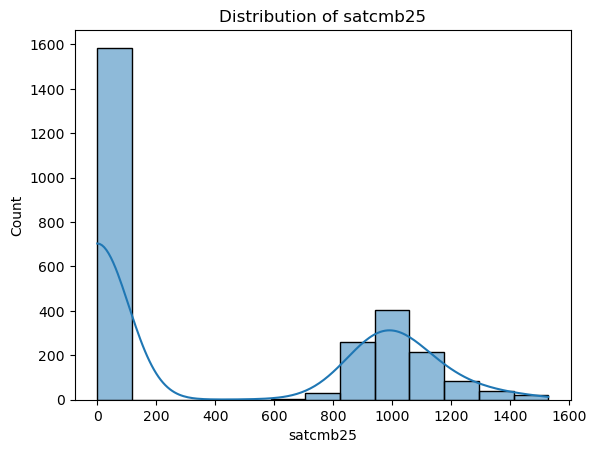

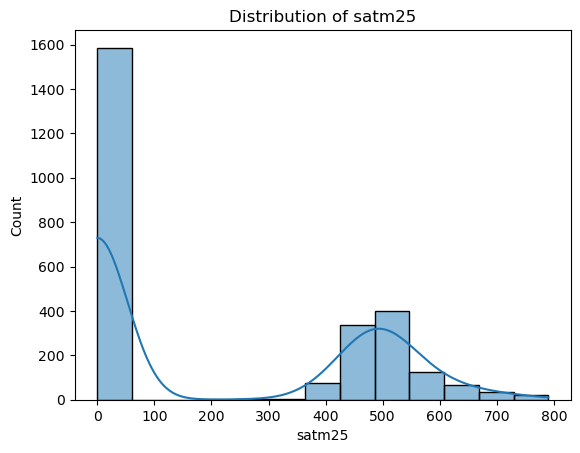

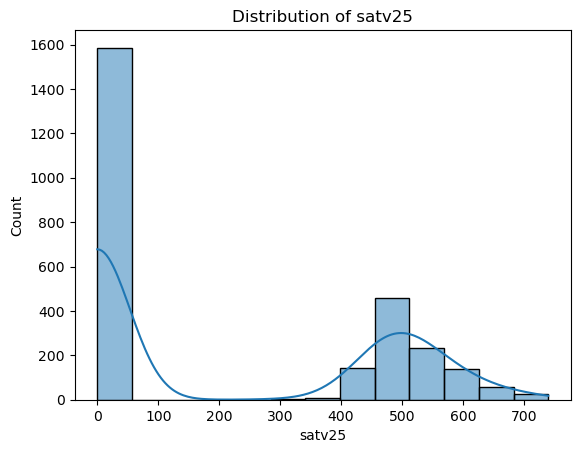

In [18]:
plot_distribution(classifications_df, act_features)

### Correlations between Size Features

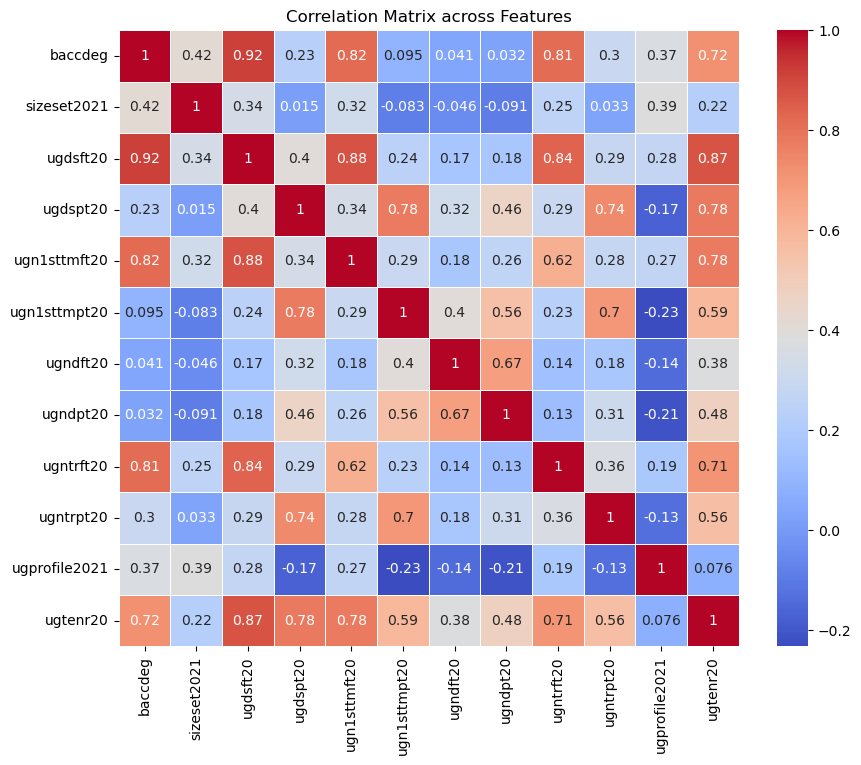

In [19]:
plot_correlations(classifications_df, size_features)

### Comparative Analysis

In [20]:
def minority_type(row):
    for minority_feature in ['hbcu', 'hsi', 'tribal']:
        if row[minority_feature] == minority_values[minority_feature]['yes']:
            return minority_feature
    return 'none'

classifications_df['minority_served'] = classifications_df.apply(minority_type, axis = 1)
classifications_df['minority_served'].value_counts()

minority_served
none      3471
hsi        332
hbcu       101
tribal      35
Name: count, dtype: int64

In [21]:
avg_act_by_minority_served = classifications_df.groupby('minority_served')[act_features].mean()
avg_act_by_minority_served

,actcmp25,actfinal,nact,satacteq25,satcmb25,satm25,satv25
minority_served,,,,,,,
hbcu,8.944444,8.891468,170.777778,8.511111,466.333333,228.588889,237.677778
hsi,6.294737,6.668133,189.126316,6.684211,352.526316,174.910526,177.621053
none,8.835188,8.763137,233.711473,8.238870,422.148973,209.965325,212.089041
tribal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


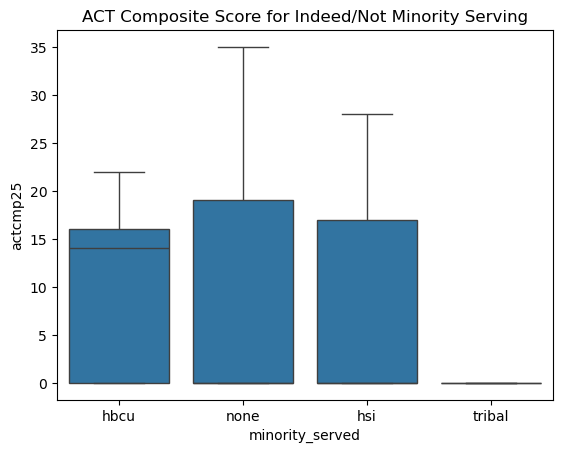

In [22]:
# Box plots of ACT Composite Score by minority_serving
sns.boxplot(x = 'minority_served', y = 'actcmp25', data = classifications_df)
plt.title('ACT Composite Score for Indeed/Not Minority Serving')
plt.show()

In [23]:
avg_act_by_minority_serving = classifications_df.groupby('msi')[act_features].mean()
avg_act_by_minority_serving

,actcmp25,actfinal,nact,satacteq25,satcmb25,satm25,satv25
msi,,,,,,,
0,8.835188,8.763137,233.711473,8.238870,422.148973,209.965325,212.089041
1,6.352381,6.562468,162.869841,6.463492,345.873016,170.812698,175.044444


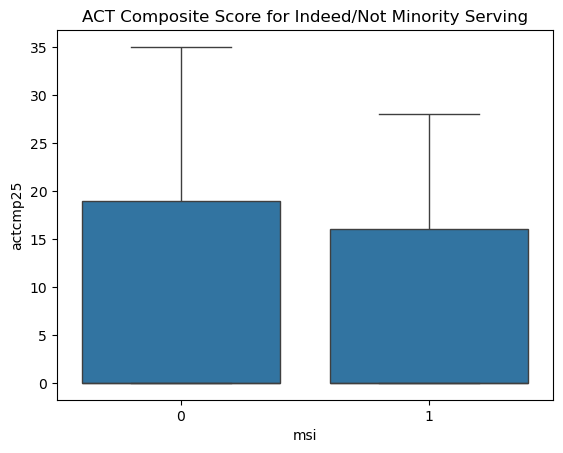

In [24]:
# Box plots of ACT Composite Score by minority_serving
sns.boxplot(x = 'msi', y = 'actcmp25', data = classifications_df)
plt.title('ACT Composite Score for Indeed/Not Minority Serving')
plt.show()

### Temporal Analysis for Basic Features

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/jk/npp70g_j2fbg8x9prxslv1zw6_ptrw/T/ipykernel_88991/1724054139.py:5: SyntaxWarning: invalid escape sequence '\d'
  basic_long['year'] = basic_long['year'].str.extract('(\d+)', expand = False).astype(int)


broad_carnegie_classification  Associate's Colleges  Baccalaureate Colleges  \
year                                                                          
2005                                           1225                     626   
2010                                           1218                     625   
2015                                           1046                     596   
2018                                           1026                     603   
2021                                           1051                     632   

broad_carnegie_classification  Master's Colleges and Universities  \
year                                                                
2005                                                          591   
2010                                                          591   
2015                                                          707   
2018                                                          649   
2021                            

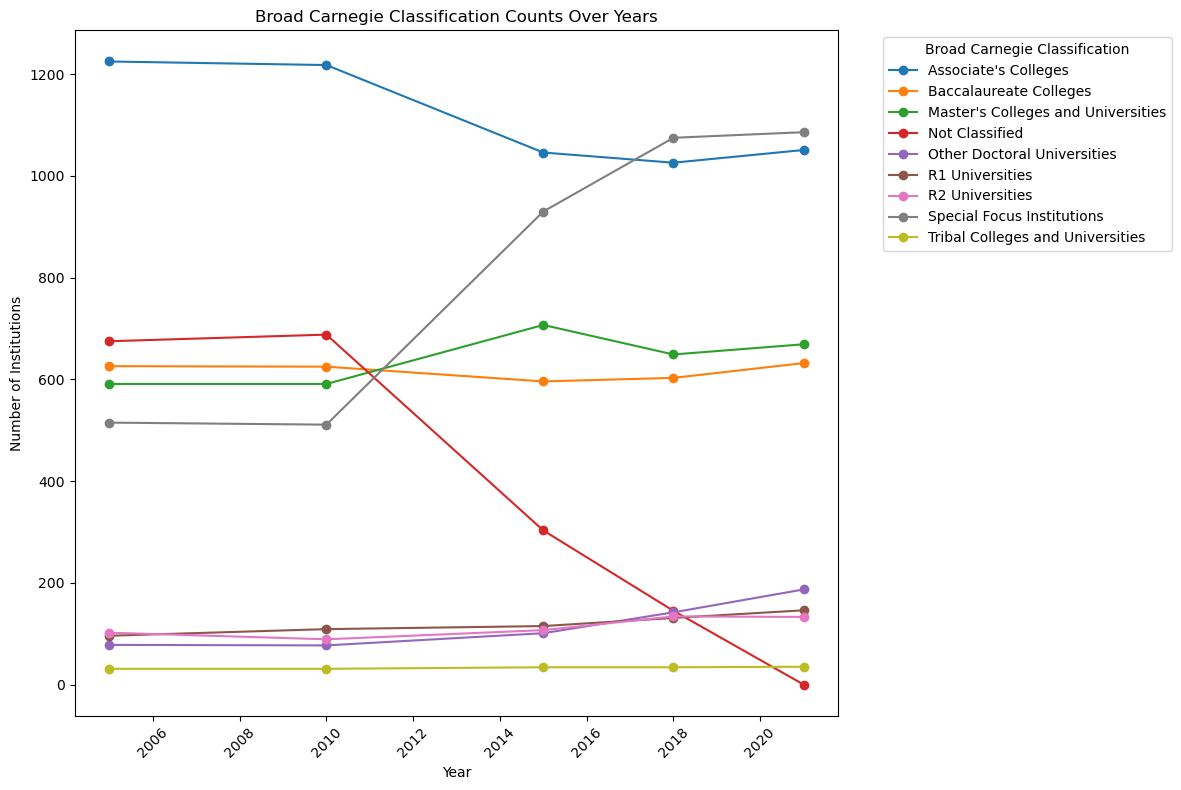

In [30]:
# Melt the basic classification features into a long format
basic_long = classifications_df.melt(id_vars = ['minority_served'], value_vars = basic_features, var_name = 'year', value_name = 'carnegie_classification_code')

# Replace 'basic2005' with 2005, etc.
basic_long['year'] = basic_long['year'].str.extract('(\d+)', expand = False).astype(int)

# Compute new column for broad Carnegie classification (since there's variability in the interpretation of the codes over the years)
def map_broad_category(row):
    year = row['year']
    classification_code = row['carnegie_classification_code']
    # Get the mapping dictionary for the specific year
    broad_category = broad_carnegie_classification[int(year)][int(classification_code)]
    # mapping = broad_carnegie_classification.get(year, {})
    # # Map the classification code to the broad category
    # broad_category = mapping.get(classification_code, 'N/A')
    return broad_category

# Apply the function to create a new 'Broad_Category' column
basic_long['broad_carnegie_classification'] = basic_long.apply(map_broad_category, axis=1)

# Count of classifications over years
classification_counts = basic_long.groupby(['year', 'broad_carnegie_classification']).size().unstack(fill_value = 0)

print(classification_counts)

# Assuming classification_counts is your DataFrame with years as the index and classifications as columns
# Plot the time series data
classification_counts.plot(kind='line', figsize=(12, 8), marker='o')

# Add titles and labels
plt.title('Broad Carnegie Classification Counts Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Institutions')
plt.xticks(rotation = 45)

# Adjust the legend
plt.legend(title = 'Broad Carnegie Classification', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Adjust layout to prevent clipping of labels and legend
plt.tight_layout()

# Display the plot
plt.show()
